In [1]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm, tqdm_notebook
import tools
%matplotlib notebook

### komentarji:
    
    - omejitev števila točk (urejeno glede na "moč" ujemanja)
    - log napak projekcije
    - boljša triangulacija!
    - unikaten identifier vsake matrike ``[R|t]`` (da niso naslavljane po indeksu)

In [2]:
SCALE = 0.2
MATCH_RATIO = 0.75 # more -> LESS matches rejected
NFEV = 3000
MODE = 'ORB'

In [3]:
d_max = 1
alpha = 0.995

In [4]:
path = 'kip'
path_calib = 'kalibracija/redmi'
images = glob.glob(os.path.join(path, '*.JPG'))
calibration_images = glob.glob(os.path.join(path_calib, '*.JPG'))

### main loop

In [5]:
scene = {}
K, distCoeffs = tools.calibrate_camera(calibration_images, (6, 4), (40, 40), scale=0.5)
N = len(images)

--- BUNDLE ADJUSTMENT ---
parameters:	534 
cost before BA:	476778716.75
optimization summary:
	cost 164348.70519
	nfev 3216.00000
	status 0
	message The maximum number of function evaluations is exceeded.
cost after BA:	328697.41 



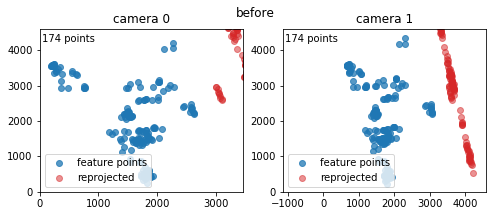

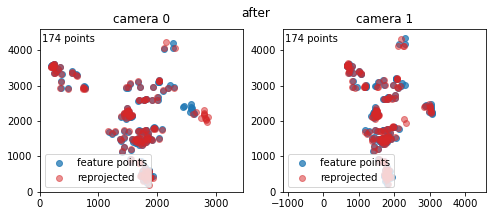

---- slika 1 ----



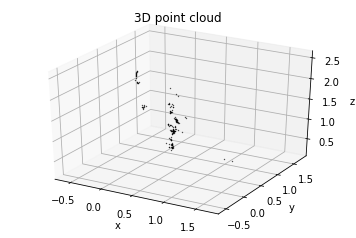

164 identified points (164 shown).


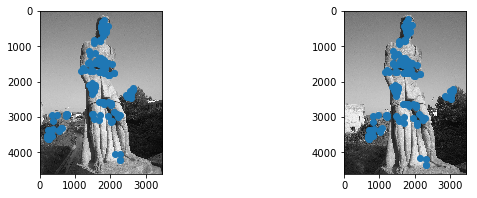

PnPRANSAC  72
--- BUNDLE ADJUSTMENT ---
parameters:	594 
cost before BA:	317879005.27
optimization summary:
	cost 1091172.93774
	nfev 3575.00000
	status 0
	message The maximum number of function evaluations is exceeded.
cost after BA:	2182345.88 



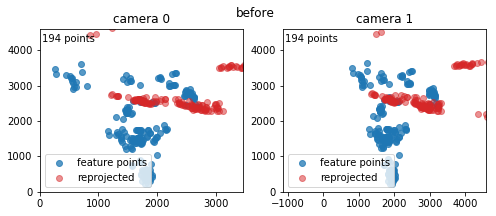

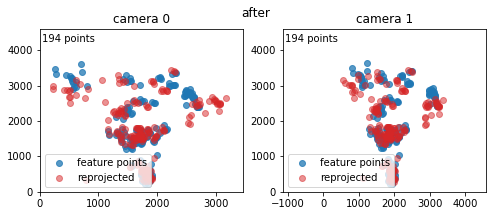

---- slika 2 ----



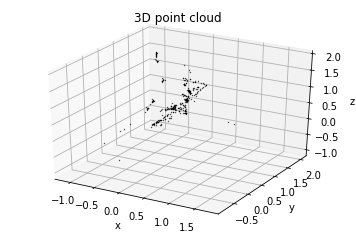

340 identified points (340 shown).


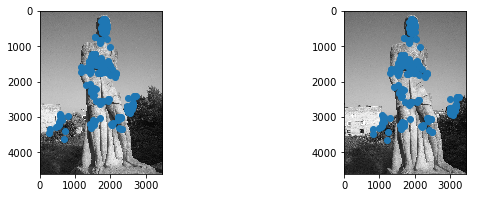

PnPRANSAC  66
--- BUNDLE ADJUSTMENT ---
parameters:	528 
cost before BA:	24705920953037.05
optimization summary:
	cost 156516534.15273
	nfev 3183.00000
	status 0
	message The maximum number of function evaluations is exceeded.
cost after BA:	313033068.31 



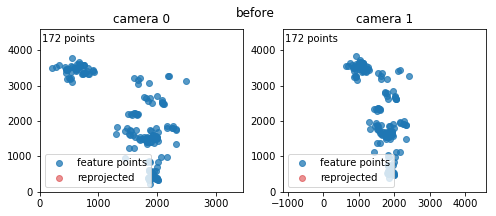

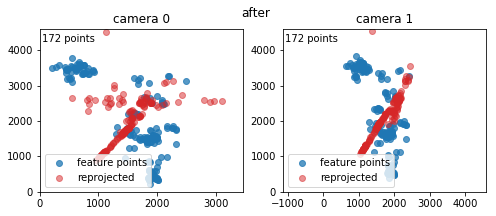

---- slika 3 ----



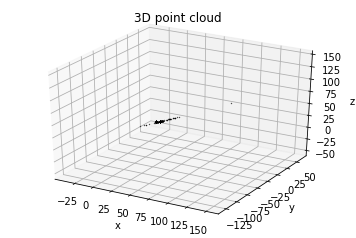

497 identified points (497 shown).


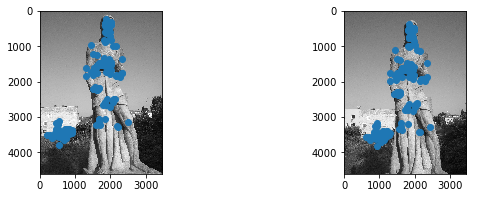

PnPRANSAC  55
--- BUNDLE ADJUSTMENT ---
parameters:	402 
cost before BA:	2075211342.10
optimization summary:
	cost 8482.62774
	nfev 3230.00000
	status 0
	message The maximum number of function evaluations is exceeded.
cost after BA:	16965.26 



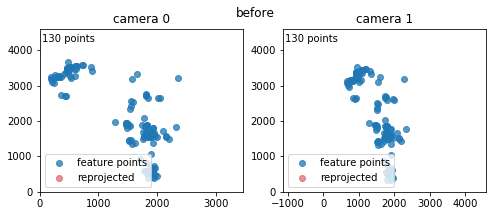

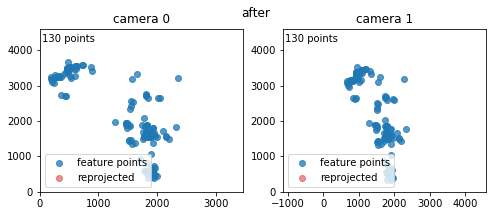

---- slika 4 ----



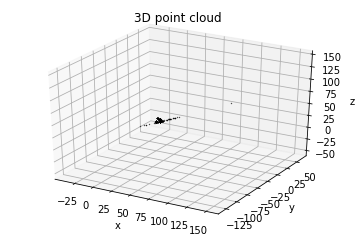

606 identified points (606 shown).


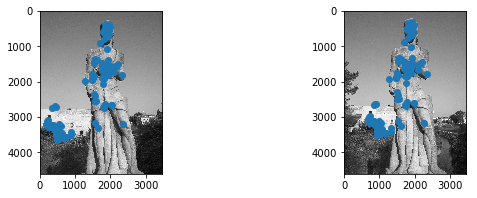

Too few (43) matches for PnPRANSAC, calculating Fundamental matrix.
--- BUNDLE ADJUSTMENT ---
parameters:	540 
cost before BA:	1937767673.85
optimization summary:
	cost 23838497.42956
	nfev 3253.00000
	status 0
	message The maximum number of function evaluations is exceeded.
cost after BA:	47676994.86 



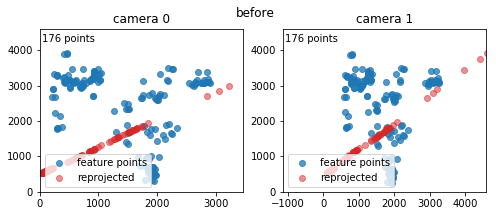

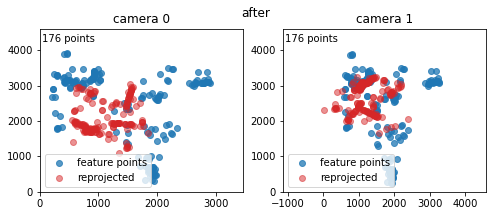

---- slika 5 ----



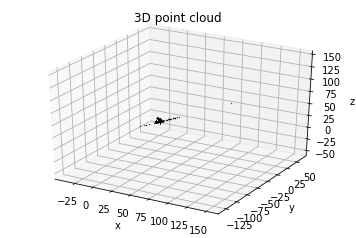

770 identified points (770 shown).


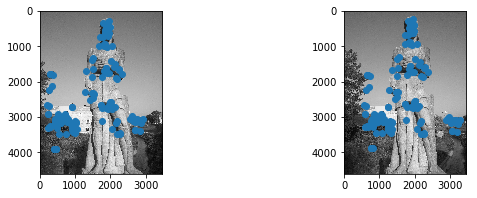

PnPRANSAC  56
--- BUNDLE ADJUSTMENT ---
parameters:	540 
cost before BA:	132005294.19
optimization summary:
	cost 16565.35775
	nfev 3251.00000
	status 0
	message The maximum number of function evaluations is exceeded.
cost after BA:	33130.72 



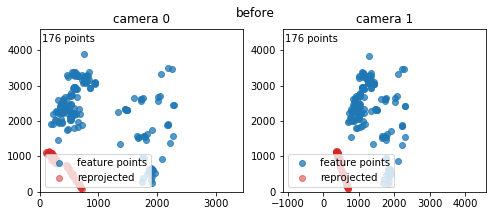

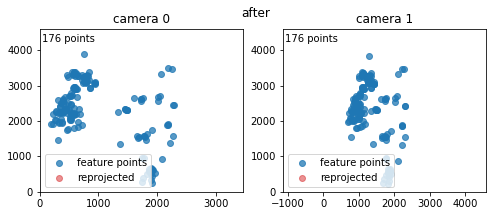

---- slika 6 ----



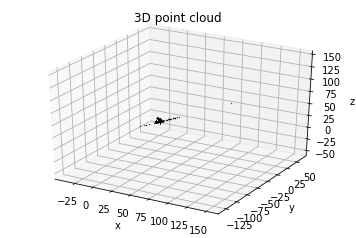

924 identified points (924 shown).


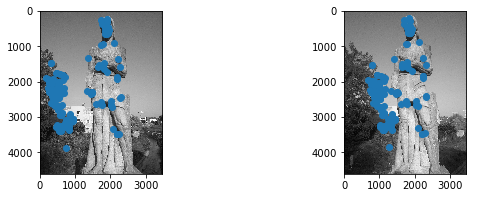

Too few (19) matches for PnPRANSAC, calculating Fundamental matrix.
--- BUNDLE ADJUSTMENT ---
parameters:	315 
cost before BA:	696812825.06
optimization summary:
	cost 0.66870
	nfev 3168.00000
	status 0
	message The maximum number of function evaluations is exceeded.
cost after BA:	1.34 



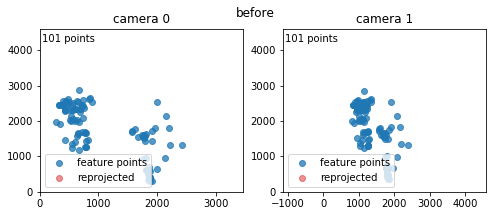

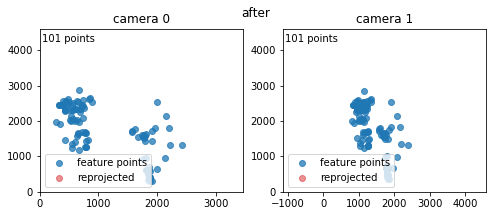

---- slika 7 ----



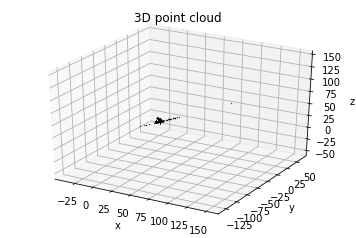

1020 identified points (1020 shown).


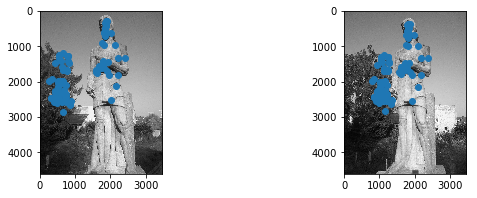

Too few (30) matches for PnPRANSAC, calculating Fundamental matrix.
--- BUNDLE ADJUSTMENT ---
parameters:	612 
cost before BA:	4754965306.02
optimization summary:
	cost 57247012.81875
	nfev 3070.00000
	status 0
	message The maximum number of function evaluations is exceeded.
cost after BA:	114494025.64 



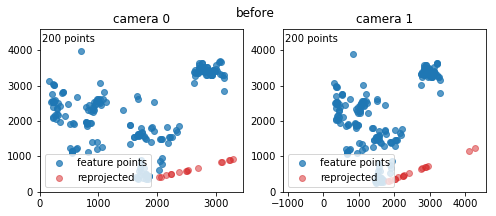

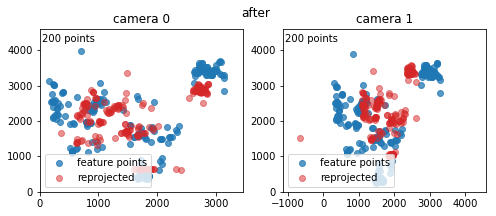

---- slika 8 ----



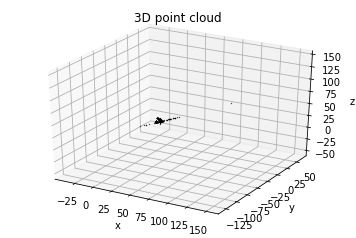

1213 identified points (1213 shown).


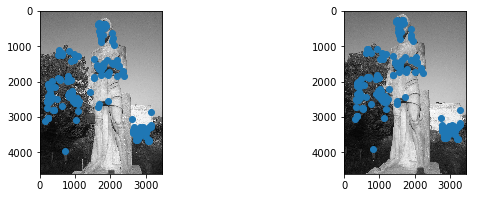

Too few (30) matches for PnPRANSAC, calculating Fundamental matrix.
--- BUNDLE ADJUSTMENT ---
parameters:	204 
cost before BA:	48676418300.96
optimization summary:
	cost 872513.26164
	nfev 3086.00000
	status 0
	message The maximum number of function evaluations is exceeded.
cost after BA:	1745026.52 



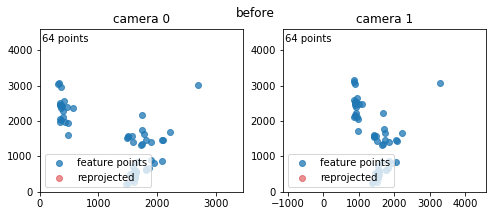

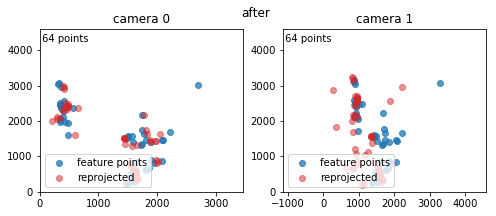

---- slika 9 ----



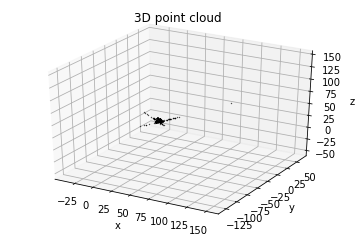

1268 identified points (1268 shown).


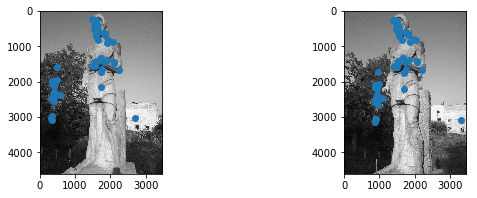

Too few (20) matches for PnPRANSAC, calculating Fundamental matrix.
--- BUNDLE ADJUSTMENT ---
parameters:	351 
cost before BA:	10712019877.74
optimization summary:
	cost 12429107.08991
	nfev 3177.00000
	status 0
	message The maximum number of function evaluations is exceeded.
cost after BA:	24858214.18 



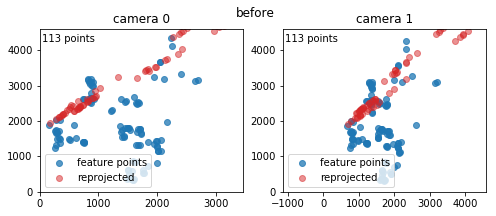

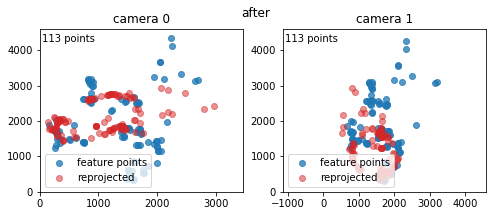

---- slika 10 ----



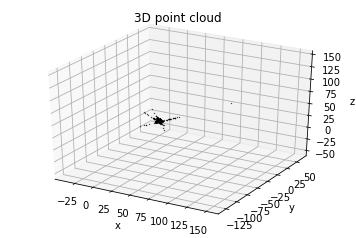

1375 identified points (1375 shown).


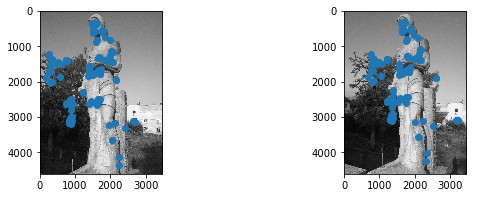

Too few (38) matches for PnPRANSAC, calculating Fundamental matrix.
--- BUNDLE ADJUSTMENT ---
parameters:	531 
cost before BA:	89061420.72
optimization summary:
	cost 26.32205
	nfev 3198.00000
	status 0
	message The maximum number of function evaluations is exceeded.
cost after BA:	52.64 



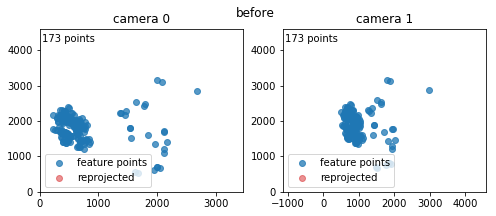

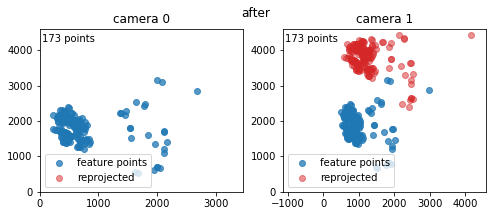

---- slika 11 ----



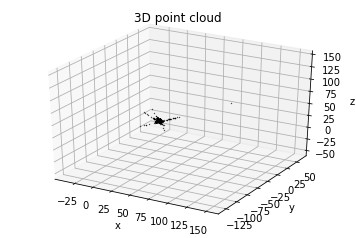

1529 identified points (1529 shown).


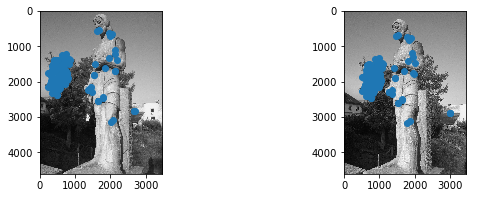

Too few (2) matches for PnPRANSAC, calculating Fundamental matrix.
--- BUNDLE ADJUSTMENT ---
parameters:	60 
cost before BA:	11120452.97
optimization summary:
	cost 88011.02819
	nfev 3059.00000
	status 0
	message The maximum number of function evaluations is exceeded.
cost after BA:	176022.06 



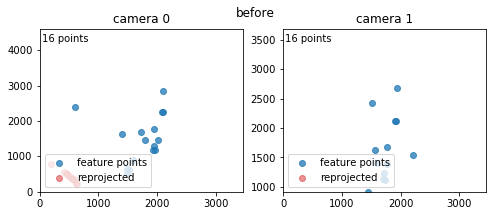

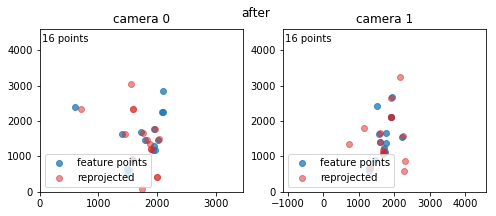

---- slika 12 ----



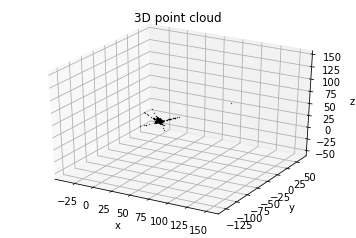

1544 identified points (1544 shown).


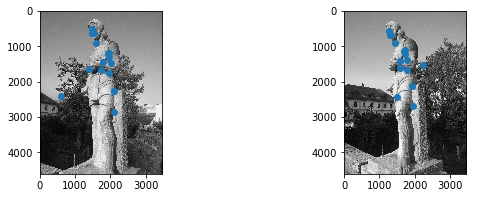

In [6]:
plot = True
%matplotlib inline

for i in tqdm_notebook(range(N - 1)):
    
    if i == 0:
        last_Rt = None
        im1 = tools.read_bw(images[i])
        im2 = tools.read_bw(images[i+1])
        Rt1, Rt2, p1, p2 = tools.get_camera_matrices(im1, im2, K, last_Rt, d_max=d_max, alpha=alpha,
                                           scale=SCALE, match_ratio=MATCH_RATIO, mode=MODE)
    else:
        im1 = im2
        im2 = tools.read_bw(images[i+1])
        Rt1, Rt2, p1, p2 = tools.get_camera_matrices_PnP(im1, im2, K, last_Rt, cloud, i, distCoeffs, 
                                            d_max=d_max, alpha=alpha, scale=SCALE, match_ratio=MATCH_RATIO, mode=MODE)

    last_Rt = Rt2
    P1 = K.dot(Rt1)
    P2 = K.dot(Rt2)
    
    points3D = []
    for x1, x2 in zip(p1, p2):
        X = tools.triangulate_lsq(tools.to_homogenous(x1), tools.to_homogenous(x2), P1, P2)
        points3D.append(tools.Point3D(X, x1, x2, i, i+1))
    
    if i == 0:
        cloud = tools.Scene([Rt1, Rt2], points3D, K, im1.shape, debug=True)
        cloud.bundle_adjustment(ftol=1e-6, max_nfev=NFEV, max_sd_dist=2, X_only=False)
    else:
        pair = tools.Scene([Rt1, Rt2], points3D, K, im1.shape, frame_offset=i, debug=True)
        pair.bundle_adjustment(ftol=1e-6, max_nfev=NFEV, max_sd_dist=2, X_only=False)
        cloud.add_next_pair(pair)
        
    if plot:# and i % (N//2) == 0:
        print('---- slika {:d} ----\n'.format((i+1)))
        cloud.render()
        
        fig, ax = plt.subplots(1, 2, figsize=(10, 3))
        ax[0].imshow(im1, cmap='gray')
        ax[0].scatter(p1[:, 0], p1[:, 1])
        ax[1].imshow(im2, cmap='gray')
        ax[1].scatter(p2[:, 0], p2[:, 1])
        plt.show()

In [7]:
#X, Y, Z = cloud.render()

In [8]:
%matplotlib
X, Y, Z = cloud.render(cameras=True)

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>

1544 identified points (1544 shown).


In [9]:
#cloud.bundle_adjustment(ftol=1e-1, max_nfev=2)
#X, Y, Z = cloud.render(cameras=True, openGL=True)

In [10]:
name = path.replace('/', '_').replace('\\', 'n')
#cloud.pickle_save(name=name, path='results', mode='scene')

In [11]:
cloud.render(openGL=True, cameras=True)

SystemExit: 0

C:\Users\Domen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
